<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/ODEtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Qiita の解説記事](https://qiita.com/tobira-code/items/d76ed91a88f112b4a474)を参考にした ODE のサンプルノート。
はじめに必要なパッケージを import する.
- numpy で多次元配列データ処理
- matplotlib でデータ可視化
- scipy.integrate で積分

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

常微分方程式 $y''=-y$ を解くために以下のように連立1階微分方程式に分解する.

\begin{align}
y'&=z \\
z'&=-y
\end{align}

コード上は $v\equiv(y,z)$ とする.
導関数を $v'\equiv f(t,v)$ とし、初期条件を $v(t=0)\equiv v_0 \equiv (1.0, 0.0)$ とすると以下のコードのようになる。

In [ ]:
def f(t, v): # t, y:v[0], y'=z:v[1]
    return [v[1], -v[0]] # y':return[0] y''=z':return[1]

v0 = [1.0, 0.0] # y0, y'0=z0

Nonstiff な微分方程式を解くためのアルゴリズム「8(5,3)次の Runge-Kutta 法(Dorman-Prince 法)」による関数 dop853 を利用する。

詳細は[こちら](https://org-technology.com/posts/ordinary-differential-equations.html).
公式ドキュメントは[こちら](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html).

In [ ]:
solver = ode(f)
solver.set_integrator(name="dop853")
solver.set_initial_value(v0)

積分区間 $0<t<tw\equiv10\times(2\pi)$,差分量 $\Delta t = tw/1000$ で計算を実行.

$ts$ に時刻データ, $ys$ に計算結果を格納.

In [ ]:
tw = 10.0*2.0*np.pi
dt = tw / 1000;
t = 0.0
ts = []
ys = []
while solver.t < tw:
    solver.integrate(solver.t+dt)
    ts += [solver.t]
    ys += [solver.y[0]]

最後にデータのプロットを行い, 解析解 $\cos(t)$ との差から誤差の蓄積を計算する.

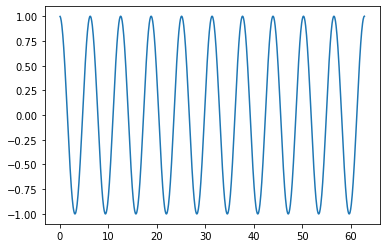

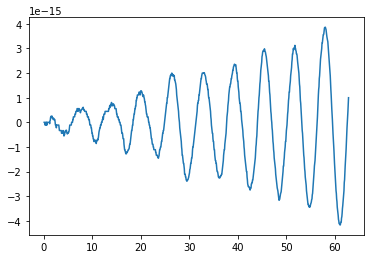

3.858025010572419e-15


In [ ]:
plt.figure(0)
plt.plot(ts, ys)

plt.figure(1)
plt.plot(ts, np.cos(ts)-ys)

plt.show()
print(np.max(np.cos(ts)-ys))